___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Forecasting Exercises
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [48]:
# RUN THIS CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse,mse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


In [16]:
df.head(20)

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7
1990-06-01,1123.5
1990-07-01,1134.2
1990-08-01,1137.4
1990-09-01,1128.8


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

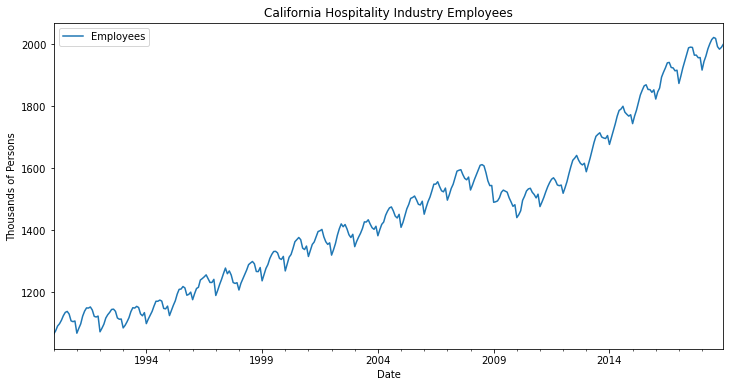

In [9]:
## CODE HERE
df.plot(figsize=(12,6))
plt.ylabel('Thousands of Persons')
plt.title('California Hospitality Industry Employees');

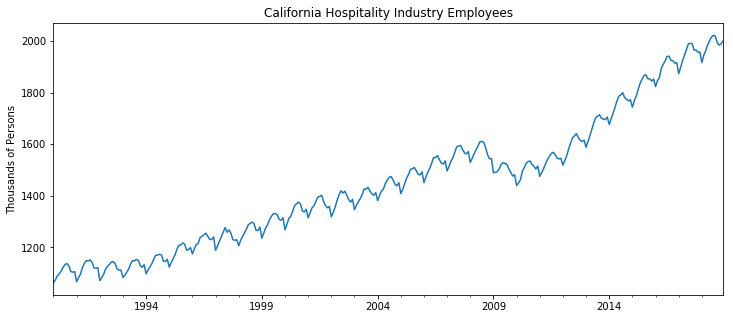

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

In [10]:
decompose = seasonal_decompose(df,model='add')

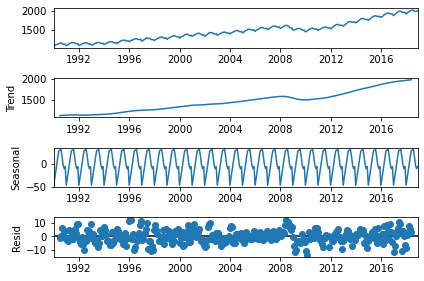

In [12]:
decompose.plot();

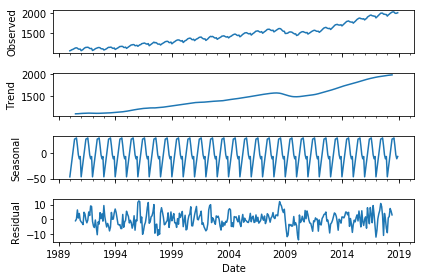

In [3]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [17]:
step_wise = auto_arima(df['Employees'],trace=True,seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2212.735, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2974.636, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2707.381, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2980.790, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2340.935, Time=0.70 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2221.297, Time=3.36 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=5.38 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2264.870, Time=2.13 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.46 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2227.508, Time=0.73 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2222.6

In [18]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Wed, 21 Apr 2021   AIC                           2208.504
Time:                                      12:58:42   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.596      0.000       0.836       1.012
ma.L1         -0.9441      0.070    -13.552      0.000      -1.081      -0.808
ma.L2          0.1289      0.060      2.152      0.031       0.011       0.246
ar.S.L12       0.9972      0.001    702.591      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.332      0.000      -0.834      -0.664
sigma2        29.2989      1.718     17.058      0.000      25.932      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [19]:
train = df[:-12]

test = df[-12:]

In [21]:
test

,Employees
Date,
2018-01-01,1916.8
2018-02-01,1944.5
2018-03-01,1962.2
2018-04-01,1984.9
2018-05-01,2001.5
2018-06-01,2015.3
2018-07-01,2022.1
2018-08-01,2019.1
2018-09-01,1992.5


In [23]:
train.tail()

,Employees
Date,
2017-08-01,1989.9
2017-09-01,1964.9
2017-10-01,1965.2
2017-11-01,1956.6
2017-12-01,1957.2


In [5]:
# DON'T WRITE HERE

### 5. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [24]:
model = SARIMAX(train['Employees'],order = (1,1,2),seasonal_order=(1,0,1,12))

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Wed, 21 Apr 2021   AIC                           2128.116
Time:                                      13:01:52   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9240      0.043     21.306      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.621      0.000      -1.096      -0.821
ma.L2          0.1499      0.061      2.455      0.014       0.030       0.270
ar.S.L12       0.9973      0.001    729.875      0.000       0.995       1.000
ma.S.L12      -0.7520      0.044    -17.164      0.000      -0.838      -0.666
sigma2        28.7602      1.684     17.083      0.000      25.460      32.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [25]:
start = len(train)

end = len(train)+len(test)-1

In [33]:
forecast = result.predict(start,end,typ='levels').rename('SARIMA Pred')

In [34]:
forecast

2018-01-01    1922.288083
2018-02-01    1941.848696
2018-03-01    1959.858670
2018-04-01    1983.210370
2018-05-01    2002.917078
2018-06-01    2019.450588
2018-07-01    2026.316077
2018-08-01    2028.258015
2018-09-01    2009.878298
2018-10-01    2004.786050
2018-11-01    1996.734137
2018-12-01    2000.538184
Freq: MS, Name: SARIMA Pred, dtype: float64

In [7]:
# DON'T WRITE HERE

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

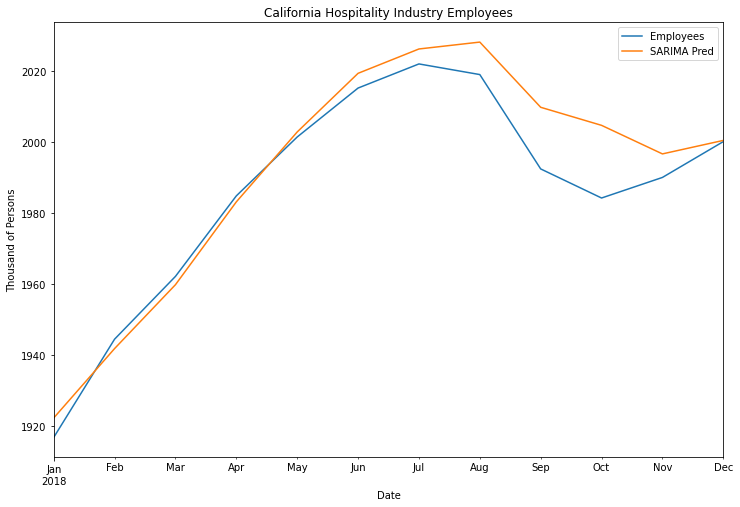

In [36]:
test.plot(figsize=(12,8),legend=True)
forecast.plot(legend=True)
plt.ylabel('Thousand of Persons')
plt.title('California Hospitality Industry Employees');

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [41]:
print('SARIMA (1,1,2) (1,0,1,12)',mse(test['Employees'],forecast))
print('SARIMA (1,1,2) (1,0,1,12)',rmse(test['Employees'],forecast))

SARIMA (1,1,2) (1,0,1,12) 77.68123420065118
SARIMA (1,1,2) (1,0,1,12) 8.813695830958268


In [49]:
from sklearn.metrics import mean_absolute_percentage_error

In [50]:
mean_absolute_percentage_error(test['Employees'],forecast)

0.003183991929010563

### 9. Retrain the model on the full data and forecast one year into the future

In [42]:
model = SARIMAX(df['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Wed, 21 Apr 2021   AIC                           2208.504
Time:                                      13:09:28   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.596      0.000       0.836       1.012
ma.L1         -0.9441      0.070    -13.552      0.000      -1.081      -0.808
ma.L2          0.1289      0.060      2.152      0.031       0.011       0.246
ar.S.L12       0.9972      0.001    702.591      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.332      0.000      -0.834      -0.664
sigma2        29.2989      1.718     17.058      0.000      25.932      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
forecast_ = result.forecast(12)

In [44]:
forecast_

2019-01-01    1963.876297
2019-02-01    1986.819843
2019-03-01    2006.002560
2019-04-01    2030.339578
2019-05-01    2050.321269
2019-06-01    2067.147739
2019-07-01    2074.929367
2019-08-01    2076.493792
2019-09-01    2056.904603
2019-10-01    2051.850332
2019-11-01    2047.937977
2019-12-01    2053.903969
Freq: MS, Name: predicted_mean, dtype: float64

In [10]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

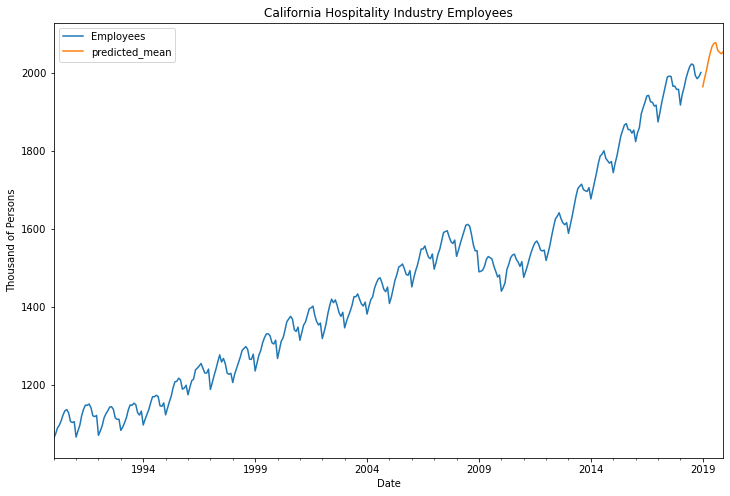

In [45]:
df.plot(figsize=(12,8),legend=True)
forecast_.plot(legend=True)
plt.ylabel('Thousand of Persons')
plt.title('California Hospitality Industry Employees');

## Great job!